# CLASSIFIÇÃO DE GÊNERO

In [1]:
library(tidyverse)
library(caret)
base_genero<-read_csv("../input/gender-classification/Transformed Data Set - Sheet1.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



── Column specification ────────────────────────────────────────────────────────
cols(
  `Favorite Color` = col_character(),
  `Favorite Music Genre` = col_character(),
  `Favorite Beverage` = col_character(),
  `Favorite Soft Drink` = col_character(),
  Gender = col_character()
)




In [2]:
base_genero

Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
<chr>,<chr>,<chr>,<chr>,<chr>
Cool,Rock,Vodka,7UP/Sprite,F
Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
Warm,Rock,Wine,Coca Cola/Pepsi,F
Warm,Folk/Traditional,Whiskey,Fanta,F
Cool,Rock,Vodka,Coca Cola/Pepsi,F
Warm,Jazz/Blues,Doesn't drink,Fanta,F
Cool,Pop,Beer,Coca Cola/Pepsi,F
Warm,Pop,Whiskey,Fanta,F
Warm,Rock,Other,7UP/Sprite,F


### CATEGORIZANDO VARIVEIS

In [3]:
names(base_genero)

[1] "Favorite Color"       "Favorite Music Genre" "Favorite Beverage"   
[4] "Favorite Soft Drink"  "Gender"

In [4]:
base_genero$`Favorite Color`<-as_factor(base_genero$`Favorite Color`)
base_genero$`Favorite Music Genre`<-as_factor(base_genero$`Favorite Music Genre`)
base_genero$`Favorite Beverage`<-as_factor(base_genero$`Favorite Beverage`)
base_genero$`Favorite Soft Drink`<-as_factor(base_genero$`Favorite Soft Drink`)
base_genero$Gender<-as_factor(base_genero$Gender)


In [5]:
base_genero

Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
<fct>,<fct>,<fct>,<fct>,<fct>
Cool,Rock,Vodka,7UP/Sprite,F
Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
Warm,Rock,Wine,Coca Cola/Pepsi,F
Warm,Folk/Traditional,Whiskey,Fanta,F
Cool,Rock,Vodka,Coca Cola/Pepsi,F
Warm,Jazz/Blues,Doesn't drink,Fanta,F
Cool,Pop,Beer,Coca Cola/Pepsi,F
Warm,Pop,Whiskey,Fanta,F
Warm,Rock,Other,7UP/Sprite,F


    Verificar Nas

In [6]:
sum(is.na(base_genero))

[1] 0

Favorite Color,n
<fct>,<int>
Cool,37
Neutral,7
Warm,22


Favorite Music Genre,n
<fct>,<int>
Rock,19
Hip hop,8
Folk/Traditional,4
Jazz/Blues,4
Pop,17
Electronic,8
R&B and soul,6


Favorite Beverage,n
<fct>,<int>
Vodka,9
Wine,10
Whiskey,9
Doesn't drink,14
Beer,13
Other,11


Gender,n
<fct>,<int>
F,33
M,33


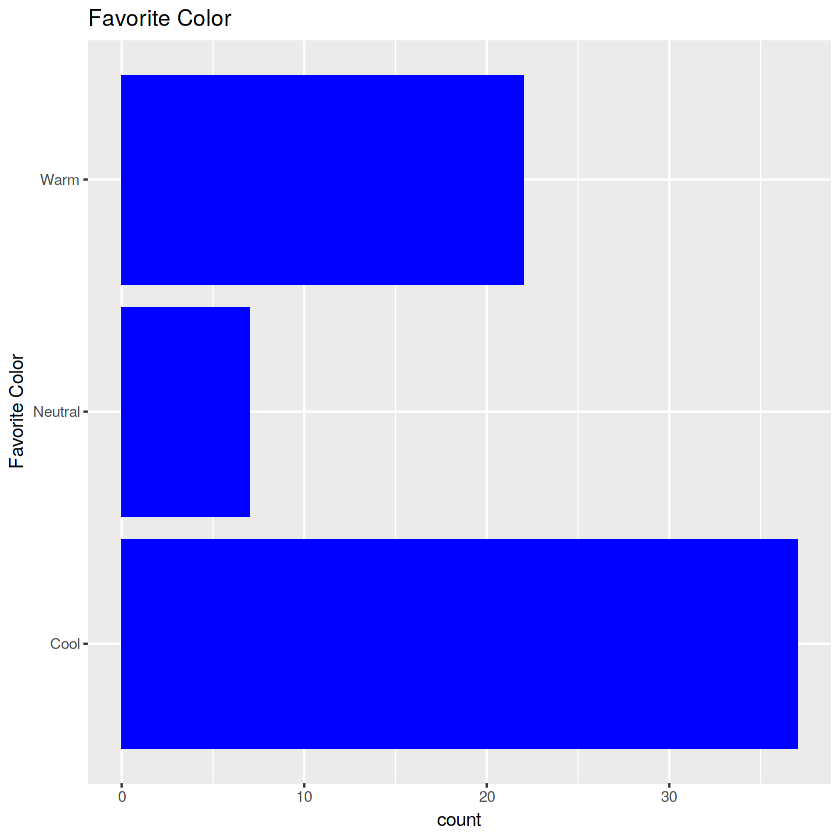

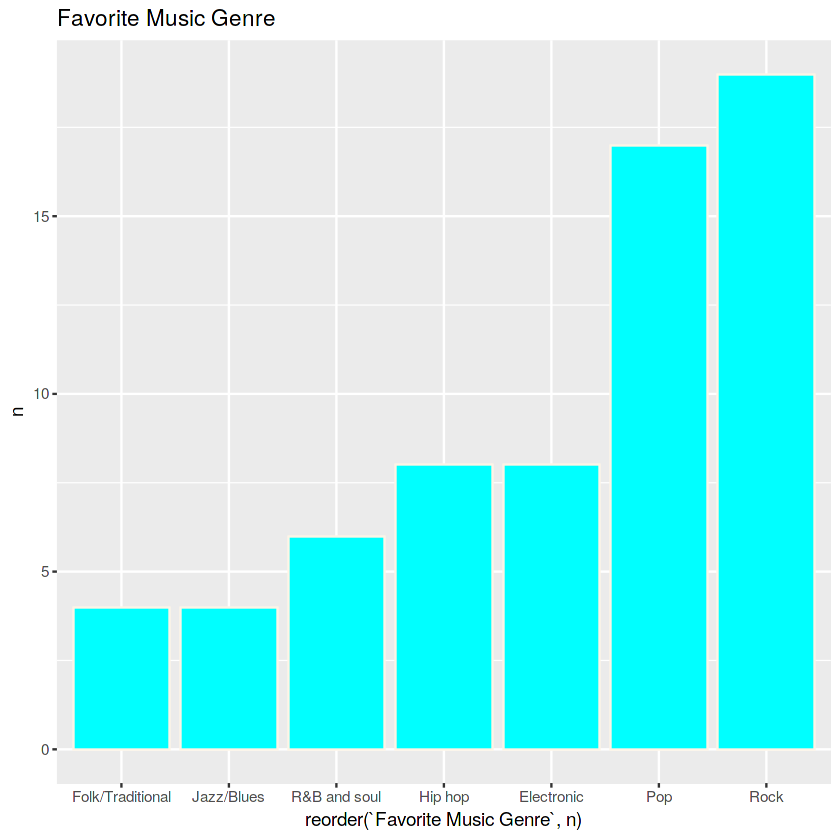

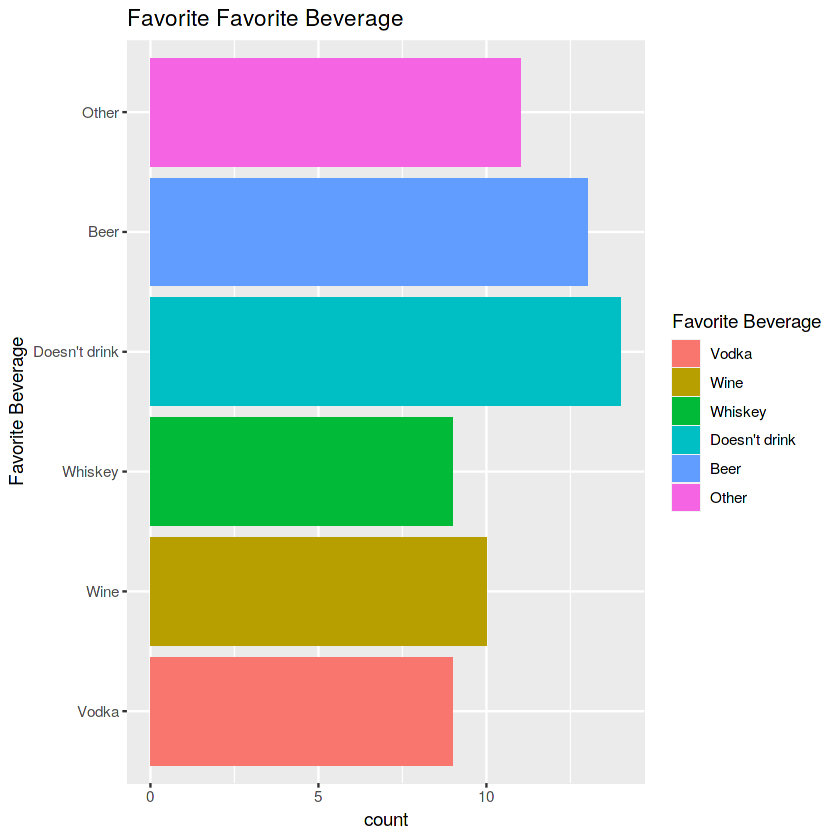

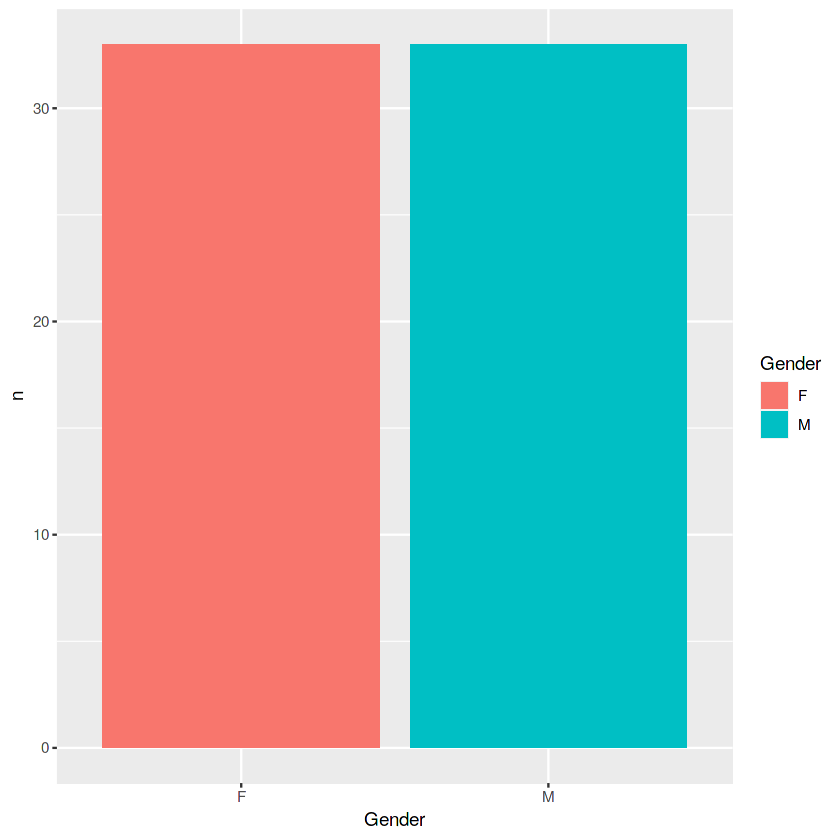

In [7]:

base_genero %>% count(`Favorite Color`)
base_genero %>% count(`Favorite Music Genre`)
base_genero %>% count(`Favorite Beverage`)
base_genero %>% count(Gender)



## `Favorite Color`

 ggplot(data = base_genero)+
        geom_bar(mapping = aes(y = `Favorite Color`),fill="blue")+
            ggtitle(label ="Favorite Color" )

## Favorite Music Genre


base_genero %>% count(`Favorite Music Genre`) %>%
 ggplot()+
    geom_col(mapping = aes(x =reorder(`Favorite Music Genre`,n) ,y=n),fill="#00FFFF",color="#FDF5E6")+
        ggtitle(label ="Favorite Music Genre" )


## Favorite Favorite Beverage

 ggplot(data = base_genero)+
        geom_bar(mapping = aes(y = `Favorite Beverage`,fill=`Favorite Beverage`))+
        ggtitle(label ="Favorite Favorite Beverage" )

### Gender 0=female 1= male
    base_genero %>% count(`Gender`) %>%
        ggplot()+
            geom_col(mapping = aes(x = `Gender`,y = n ,fill=`Gender`))

## Transformar variaveis categóricas em valores numericos,
## para testar modelo de Regressão Logística

In [8]:
levels(base_genero$`Favorite Color`)<-c(1:3)
levels(base_genero$`Favorite Music Genre`)<-c(1:7)
levels(base_genero$`Favorite Beverage`)<-c(1:6)
levels(base_genero$`Favorite Soft Drink`)<-c(1:4)
levels(base_genero$Gender)<-c(0:1)

### Dividir base de dados. 70-30

In [9]:
library(caTools)
set.seed(10)
divisao<-sample.split(Y = base_genero$Gender,SplitRatio = 0.70)
base_treinamento<-subset(x = base_genero,subset = divisao == TRUE )
base_teste<-subset(x = base_genero,subset = divisao == FALSE )

In [10]:
head(base_treinamento,3)

Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,0
2,2,1,2,0
3,1,2,2,0


### Treinando algoritmo Random Forest

In [11]:
library(randomForest)
set.seed(1)
mdl_randonForest<-randomForest(x = base_treinamento[,1:4],y = base_treinamento$Gender,ntree =15)
print(mdl_randonForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(x = base_treinamento[, 1:4], y = base_treinamento$Gender,      ntree = 15) 
               Type of random forest: classification
                     Number of trees: 15
No. of variables tried at each split: 2

        OOB estimate of  error rate: 47.83%
Confusion matrix:
   0  1 class.error
0 13 10   0.4347826
1 12 11   0.5217391


### Previsão do modelo de Random Forest

In [12]:
previsao<-predict(mdl_randonForest,newdata = base_teste[,-5])
previsao

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 1  0  0  1  0  0  0  1  0  0  1  0  0  0  0  0  1  0  0  1 
Levels: 0 1

### Verificar acuracidade do modelo RandomForest

In [13]:
matriz_de_confusao<-table(base_teste$Gender,previsao)

In [14]:
library(caret)
confusionMatrix(matriz_de_confusao)

Confusion Matrix and Statistics

   previsao
    0 1
  0 7 3
  1 7 3
                                        
               Accuracy : 0.5           
                 95% CI : (0.272, 0.728)
    No Information Rate : 0.7           
    P-Value [Acc > NIR] : 0.9829        
                                        
                  Kappa : 0             
                                        
 Mcnemar's Test P-Value : 0.3428        
                                        
            Sensitivity : 0.50          
            Specificity : 0.50          
         Pos Pred Value : 0.70          
         Neg Pred Value : 0.30          
             Prevalence : 0.70          
         Detection Rate : 0.35          
   Detection Prevalence : 0.50          
      Balanced Accuracy : 0.50          
                                        
       'Positive' Class : 0             
                                        

### Testando modelo de maquinas de vetores de suporte.

In [15]:
library(e1071)
mdl_svm<-svm(formula = Gender~.,data = base_treinamento,type = "C-classification",kernel = "radial",cost = 1)
print(mdl_svm)


Call:
svm(formula = Gender ~ ., data = base_treinamento, type = "C-classification", 
    kernel = "radial", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  44



### Previsão do modelo de SVM

In [16]:
previsaoSVM<-predict(mdl_svm,base_teste[,-5])
print(previsaoSVM)

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 1  0  0  0  0  1  0  1  1  0  1  0  1  0  1  0  1  1  0  1 
Levels: 0 1


### Verificar acuracidade do modelo de maquinas de vetores de suporte.

In [17]:
library(caret)
matriz_confusao_SVM<-table(previsaoSVM,base_teste$Gender)
confusionMatrix(matriz_confusao_SVM)

Confusion Matrix and Statistics

           
previsaoSVM 0 1
          0 6 4
          1 4 6
                                          
               Accuracy : 0.6             
                 95% CI : (0.3605, 0.8088)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.2517          
                                          
                  Kappa : 0.2             
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.6             
            Specificity : 0.6             
         Pos Pred Value : 0.6             
         Neg Pred Value : 0.6             
             Prevalence : 0.5             
         Detection Rate : 0.3             
   Detection Prevalence : 0.5             
      Balanced Accuracy : 0.6             
                                          
       'Positive' Class : 0               
                                          

In [18]:
head(base_genero,2)

Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,0
2,2,1,2,0


## Modelo Regresão Logística

In [19]:
mdl_RL<-glm(formula = Gender~.,family = binomial,data = base_treinamento) # glm() ja pertence ao R base.

In [20]:
mdl_RL


Call:  glm(formula = Gender ~ ., family = binomial, data = base_treinamento)

Coefficients:
            (Intercept)        `Favorite Color`2        `Favorite Color`3  
                 0.4342                  -0.3024                   0.9263  
`Favorite Music Genre`2  `Favorite Music Genre`3  `Favorite Music Genre`4  
                 3.3751                   0.3513                  -0.6612  
`Favorite Music Genre`5  `Favorite Music Genre`6  `Favorite Music Genre`7  
                -1.5647                   1.4768                   2.0645  
   `Favorite Beverage`2     `Favorite Beverage`3     `Favorite Beverage`4  
                -2.9435                  -0.6542                  -0.9403  
   `Favorite Beverage`5     `Favorite Beverage`6   `Favorite Soft Drink`2  
                -1.2528                  -1.5082                  -0.7960  
 `Favorite Soft Drink`3   `Favorite Soft Drink`4  
                 0.1549                   2.4456  

Degrees of Freedom: 45 Total (i.e. Null);  2

### Previsao com Regressão Logística.

In [21]:
previsao_RL<-predict(mdl_RL,newdata = base_teste[,-5],type="response")
previsao_RL

1          2          3          4          5          6          7 
0.77075621 0.46315816 0.06669044 0.11196591 0.09722651 0.54985700 0.41051391 
         8          9         10         11         12         13         14 
0.87812764 0.51557211 0.05381666 0.94917150 0.63021583 0.16734187 0.07700221 
        15         16         17         18         19         20 
0.16385833 0.07520778 0.93624184 0.21380393 0.03538804 0.46559779

## Ajustando valores da previsão

In [22]:
previsao_RL<-ifelse(test = previsao_RL >= 0.5,yes = 1,no = 0)
previsao_RL

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 1  0  0  0  0  1  0  1  1  0  1  1  0  0  0  0  1  0  0  0

### Verificar acuracidade do modelo da Regressão Logistica.

In [23]:
library(caret)
matriz_confusao_RL<-table(previsao_RL,base_teste$Gender)
confusionMatrix(matriz_confusao_RL)

Confusion Matrix and Statistics

           
previsao_RL 0 1
          0 6 7
          1 4 3
                                          
               Accuracy : 0.45            
                 95% CI : (0.2306, 0.6847)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.7483          
                                          
                  Kappa : -0.1            
                                          
 Mcnemar's Test P-Value : 0.5465          
                                          
            Sensitivity : 0.6000          
            Specificity : 0.3000          
         Pos Pred Value : 0.4615          
         Neg Pred Value : 0.4286          
             Prevalence : 0.5000          
         Detection Rate : 0.3000          
   Detection Prevalence : 0.6500          
      Balanced Accuracy : 0.4500          
                                          
       'Positive' Class : 0               
                                          

### O modelo com maior acuracidade foi o SVM. 60%